#### Import necessary libraries

In [168]:
import pandas as pd
import torch
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from torch import nn
import warnings
import numpy as np
warnings.filterwarnings('ignore')

#### Import files into dataframe

In [169]:
file_path = "Housing.csv"

In [170]:
df = pd.read_csv(file_path)

In [171]:
df = df.sample(frac=1, random_state=42)

In [172]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished
77,6650000,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished
360,3710000,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
90,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
493,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 316 to 102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


In [174]:
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus','parking']
numerical_features = [['price','area', 'bedrooms', 'bathrooms', 'stories']]

In [175]:
df.shape

(545, 13)

#### Feature Engineering

In [176]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [177]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [178]:
le = LabelEncoder()
for column in categorical_features:
    df[column] = le.fit_transform(df[column])

In [179]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,2
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,0
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,1
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,1
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,0


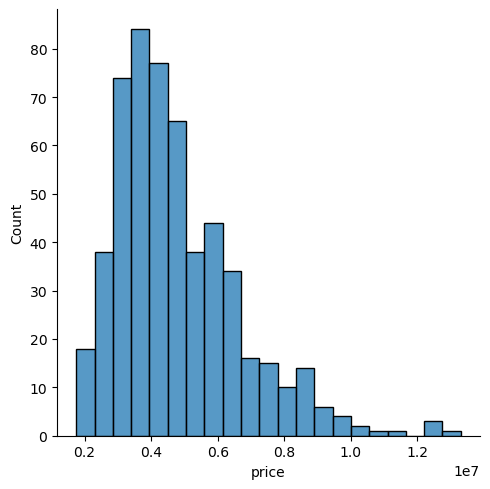

In [180]:
sns.displot(df['price'])

<Axes: ylabel='area'>

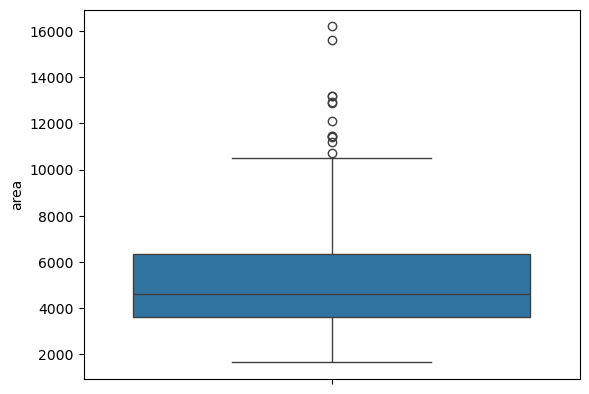

In [181]:
sns.boxplot(df['area'])

<Axes: ylabel='price'>

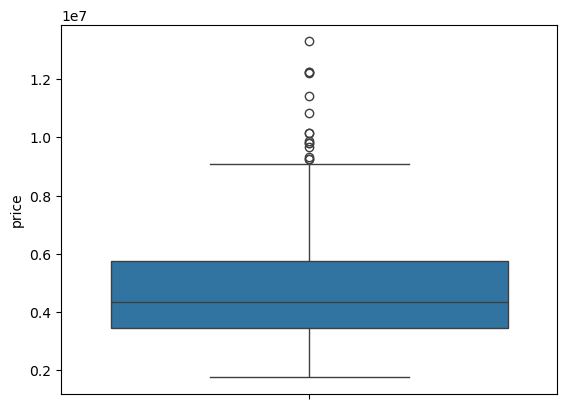

In [182]:
sns.boxplot(df['price'])

In [183]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
IQR, Q1, Q3

(2310000.0, 3430000.0, 5740000.0)

In [184]:
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR

upper_bound, lower_bound

(12670000.0, -3500000.0)

In [185]:
df = df[(df['price'] <= upper_bound) & (df['price'] >=  lower_bound)]

In [186]:
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

IQR_area, Q1_area, Q3_area

(2764.0, 3596.0, 6360.0)

In [187]:
upper_bound_area = Q3_area + 3 * IQR_area
lower_bound_area = Q1_area - 3 * IQR_area

upper_bound_area, lower_bound_area
df = df[(df['area'] <= upper_bound_area) & (df['area'] >=  lower_bound_area)]

In [188]:
# for column in numerical_features:
#     df[column] = np.log(df[column])

In [189]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,2
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,0
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,1
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,1
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,0


In [190]:
scaler = MinMaxScaler()
for column in numerical_features:
    df[column] = scaler.fit_transform(df[column])

In [191]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,0.220000,0.367965,0.6,0.333333,0.333333,0,0,1,0,0,1,0,2
77,0.466667,0.419913,0.4,0.333333,0.666667,1,0,0,0,1,0,1,0
360,0.186667,0.206926,0.2,0.000000,0.000000,1,0,0,0,0,0,0,1
90,0.446667,0.290043,0.4,0.000000,0.333333,1,0,0,0,1,0,0,1
493,0.100000,0.200000,0.4,0.000000,0.000000,1,0,0,0,0,0,0,0


<Axes: >

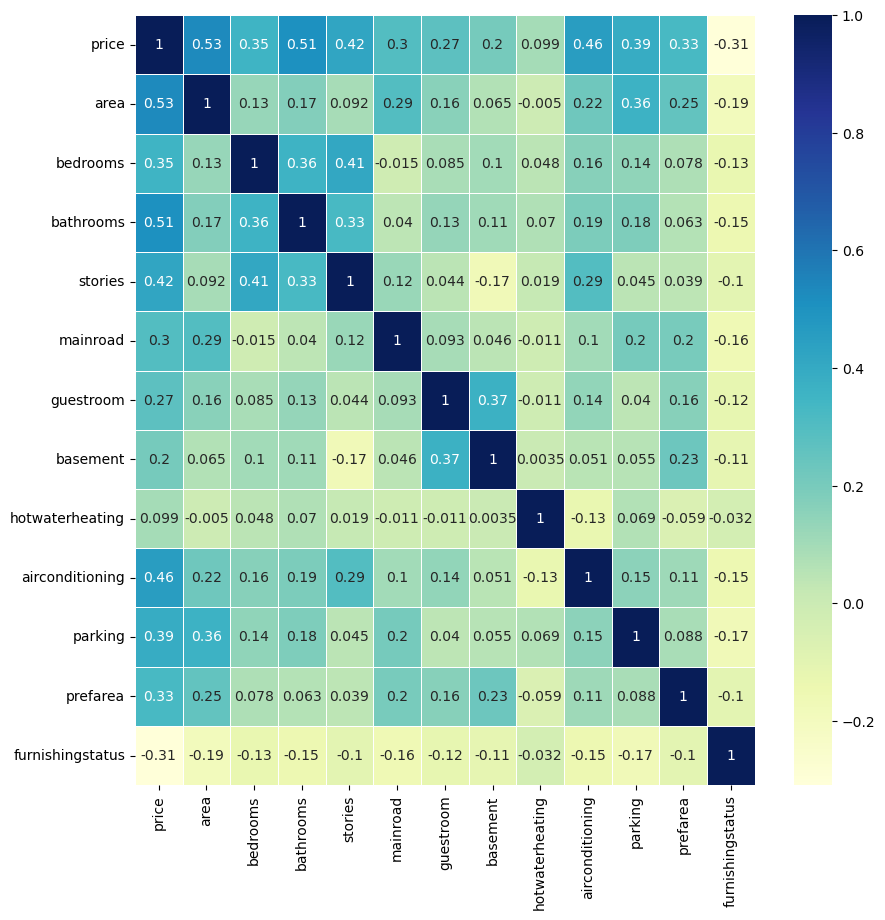

In [192]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), cmap="YlGnBu", linewidths=.5, ax=ax, annot=True) 

In [193]:
df = df.drop(['hotwaterheating'], axis=1)

In [194]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
316,0.220000,0.367965,0.6,0.333333,0.333333,0,0,1,0,1,0,2
77,0.466667,0.419913,0.4,0.333333,0.666667,1,0,0,1,0,1,0
360,0.186667,0.206926,0.2,0.000000,0.000000,1,0,0,0,0,0,1
90,0.446667,0.290043,0.4,0.000000,0.333333,1,0,0,1,0,0,1
493,0.100000,0.200000,0.4,0.000000,0.000000,1,0,0,0,0,0,0


<Figure size 1200x600 with 0 Axes>

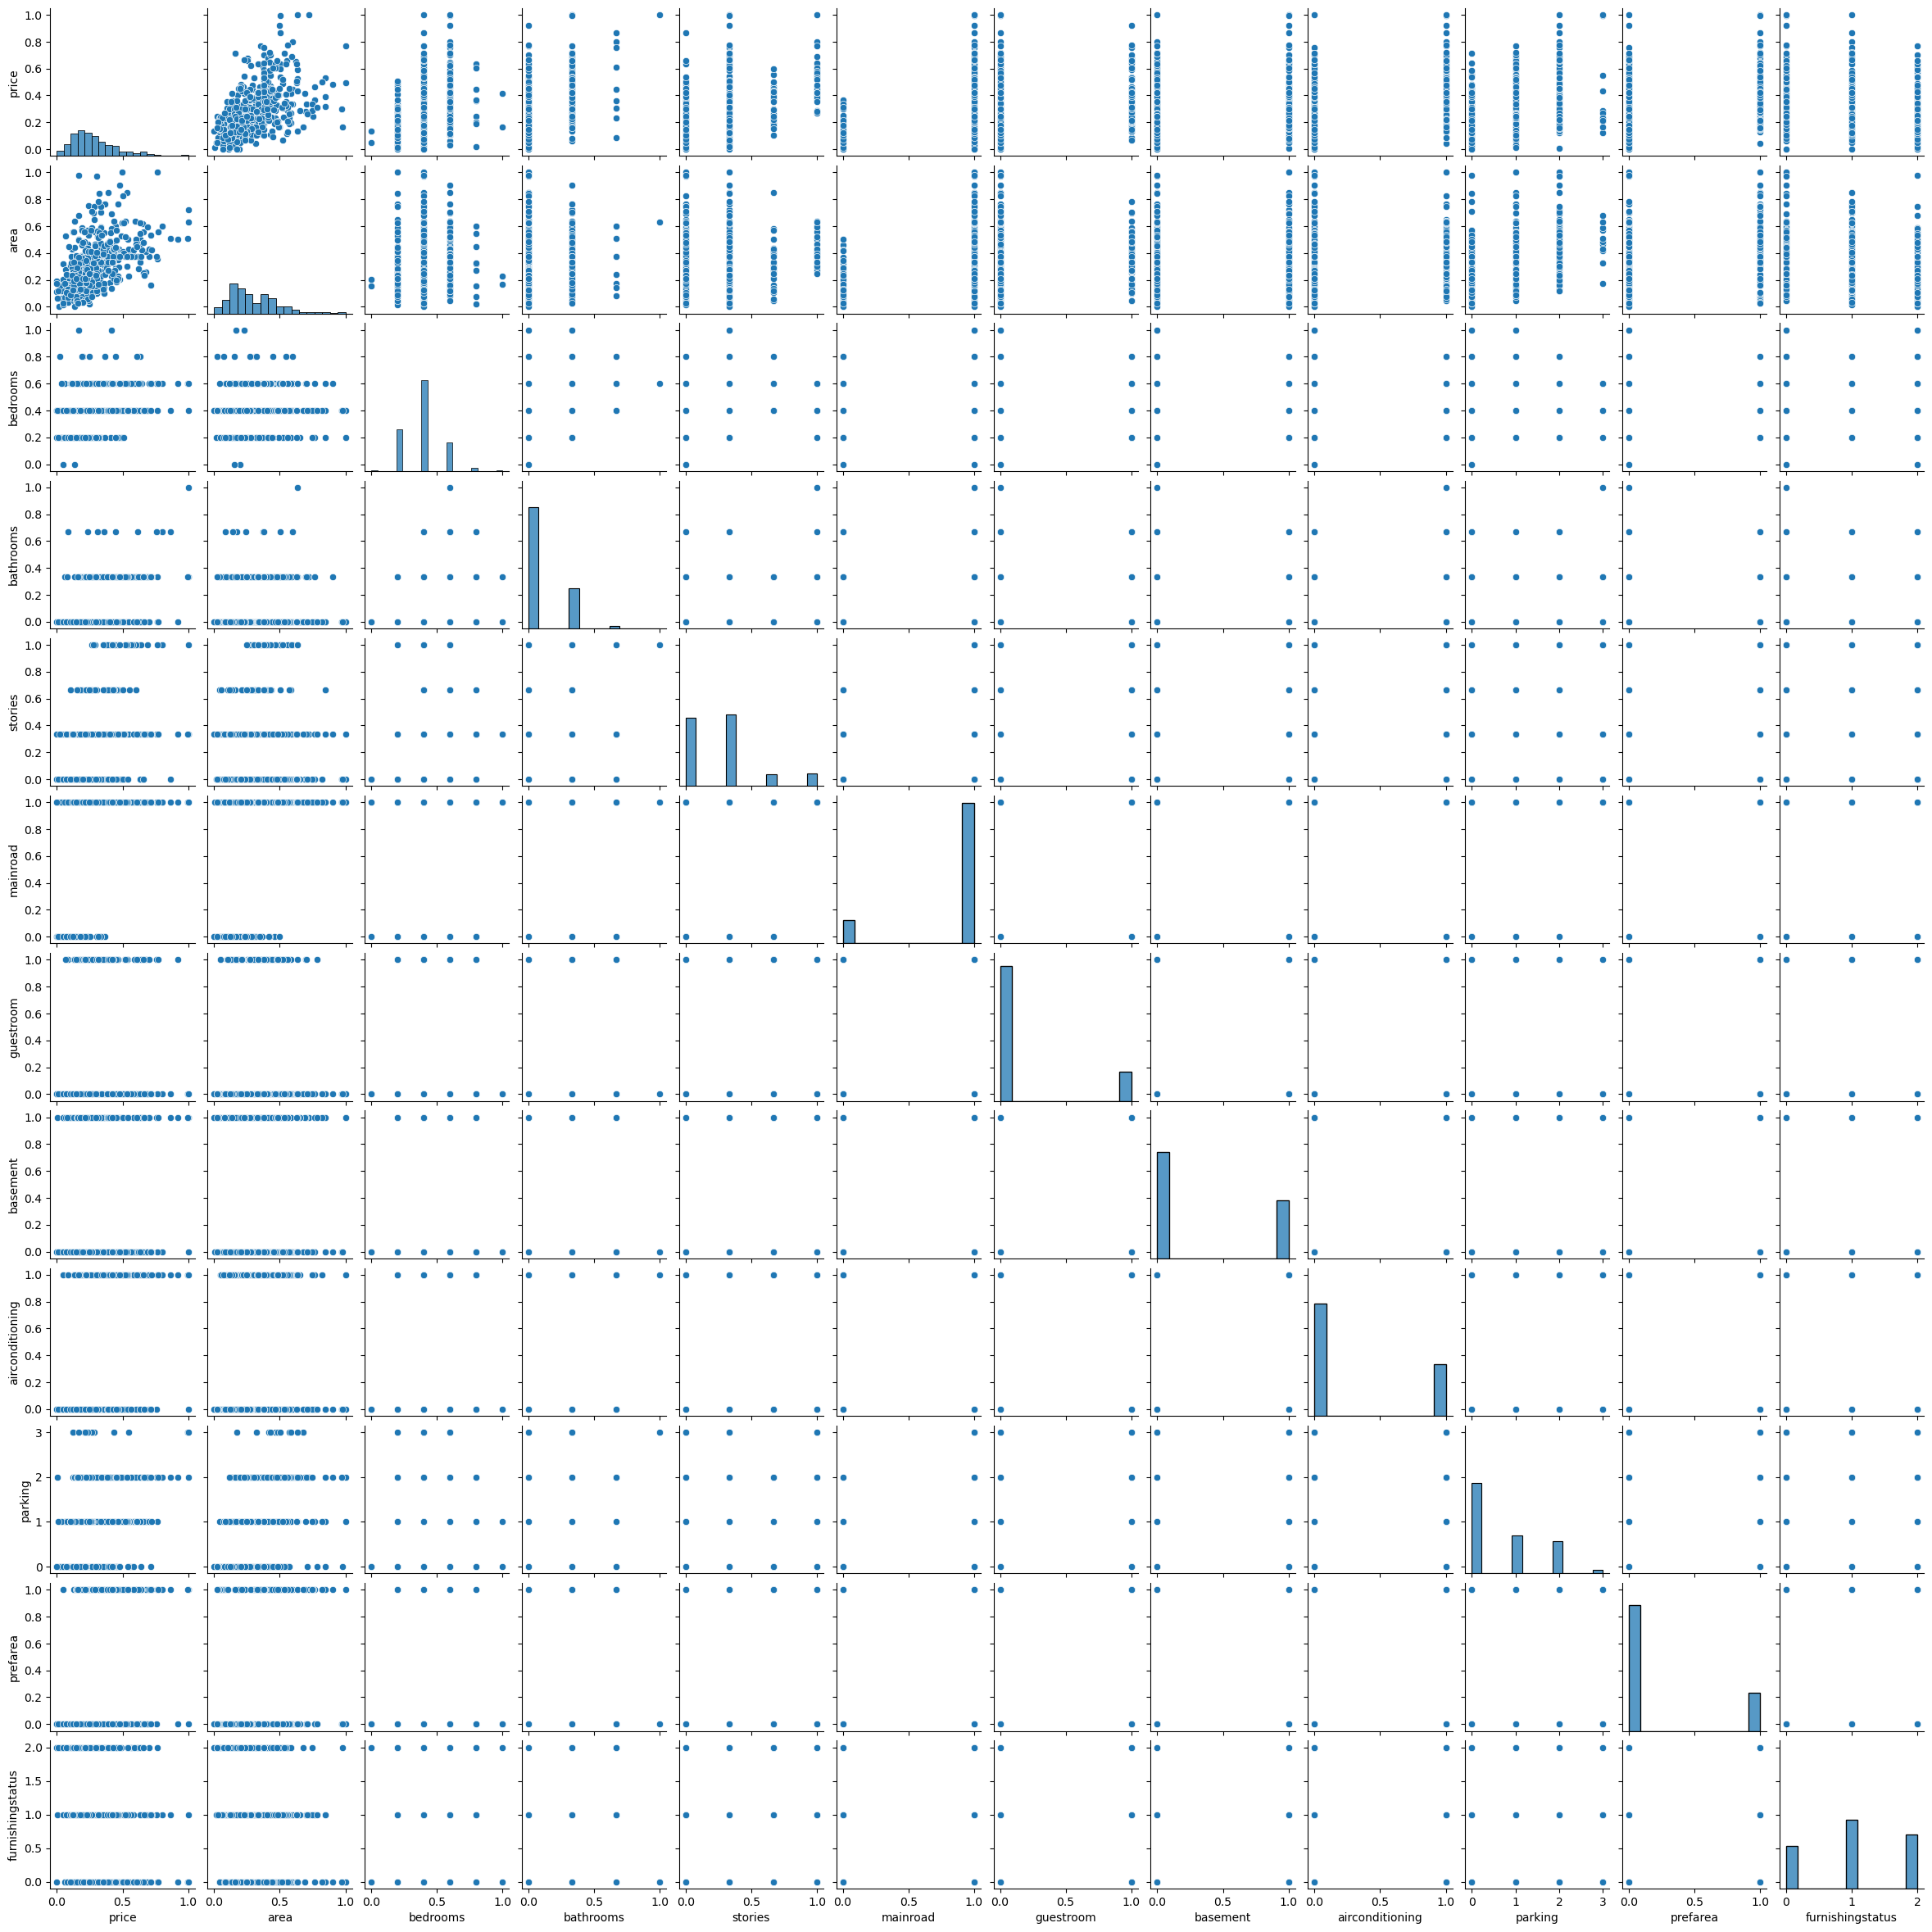

In [195]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, diag_kind="hist", height=2)
plt.show()

#### Train-test split

In [196]:
# X = df_new.iloc[:,1:]
# X = torch.from_numpy(selected_df['area_log'].values.reshape(-1,1)).float()
X = torch.from_numpy(df.iloc[:,1:].values)
X

tensor([[0.3680, 0.6000, 0.3333,  ..., 1.0000, 0.0000, 2.0000],
        [0.4199, 0.4000, 0.3333,  ..., 0.0000, 1.0000, 0.0000],
        [0.2069, 0.2000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.2468, 0.4000, 0.3333,  ..., 1.0000, 0.0000, 0.0000],
        [0.2069, 0.2000, 0.0000,  ..., 0.0000, 0.0000, 2.0000],
        [0.3333, 0.4000, 0.3333,  ..., 1.0000, 0.0000, 1.0000]],
       dtype=torch.float64)

In [197]:
# y = df_new.iloc[:,:1
# y = torch.from_numpy(selected_df['price_log'].values.reshape(-1,1)).float()
y = torch.from_numpy(df.iloc[:,:1].values)
y

tensor([[0.2200],
        [0.4667],
        [0.1867],
        [0.4467],
        [0.1000],
        [0.3000],
        [0.3333],
        [0.2660],
        [0.0667],
        [0.1527],
        [0.8000],
        [0.0867],
        [0.1533],
        [0.1533],
        [0.0500],
        [0.0867],
        [0.0867],
        [0.5333],
        [0.1133],
        [0.1067],
        [0.4733],
        [0.3500],
        [0.0133],
        [0.3333],
        [0.2327],
        [1.0000],
        [0.1267],
        [0.3200],
        [0.7667],
        [0.0733],
        [0.4800],
        [0.1667],
        [0.4667],
        [0.1133],
        [0.1500],
        [0.2333],
        [0.3000],
        [0.1467],
        [0.1667],
        [0.0600],
        [0.3567],
        [0.1833],
        [0.4667],
        [0.3007],
        [0.1333],
        [0.2600],
        [0.4600],
        [0.3800],
        [0.1193],
        [0.0067],
        [0.6333],
        [0.0667],
        [0.2400],
        [0.2150],
        [0.1413],
        [0

In [198]:
X.shape, y.shape

(torch.Size([542, 11]), torch.Size([542, 1]))

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [200]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([433, 11]),
 torch.Size([109, 11]),
 torch.Size([433, 1]),
 torch.Size([109, 1]))

In [201]:
import math

def xavier_init(in_features, out_features):
    std = math.sqrt(1 / (in_features + out_features))
    return torch.empty((out_features, in_features)).normal_(0, std)


In [202]:
import torch.optim as optim

alpha = 0.001
losses = []
torch.manual_seed(42)
weight = torch.randn(X_train.shape[1], 1,dtype=X_train.dtype, requires_grad=True)
print(X_train.shape)
bias = torch.zeros(1,1, requires_grad=True)
# optimizer = optim.SGD(model.parameters(), lr=0.05)

for i in range(500):
    Z = X_train @ weight + bias
    L = torch.mean(torch.log(torch.cosh(Z - y_train)))
    losses.append(L.item())
    for i in [Z,L]:
        i.retain_grad()
    dL_dZ = torch.tanh(Z-y_train)
    dL_dW = X_train.t() @ dL_dZ
    dL_dB = dL_dZ.sum(0, keepdim=True)
    # L.backward()
    with torch.no_grad():
        weight -= alpha * dL_dW
        bias -= alpha * dL_dB

torch.Size([433, 11])


In [203]:
X_train.shape, weight.shape, weight

(torch.Size([433, 11]),
 torch.Size([11, 1]),
 tensor([[ 0.2895],
         [ 0.0668],
         [ 0.2862],
         [ 0.1380],
         [ 0.0301],
         [ 0.0405],
         [ 0.0335],
         [ 0.0717],
         [ 0.0282],
         [ 0.0597],
         [-0.0163]], dtype=torch.float64, requires_grad=True))

In [204]:
Z - y_train

tensor([[-0.0114],
        [ 0.0208],
        [ 0.1163],
        [ 0.0073],
        [ 0.0997],
        [ 0.0774],
        [ 0.1335],
        [-0.0333],
        [ 0.0294],
        [ 0.0251],
        [ 0.0852],
        [ 0.0022],
        [ 0.0182],
        [ 0.0223],
        [ 0.0643],
        [-0.0177],
        [-0.0885],
        [-0.0156],
        [ 0.0836],
        [ 0.0872],
        [-0.0946],
        [-0.0081],
        [ 0.0564],
        [-0.1319],
        [-0.0859],
        [ 0.0743],
        [-0.0412],
        [-0.0910],
        [-0.0174],
        [-0.1524],
        [ 0.1026],
        [-0.4283],
        [-0.0630],
        [ 0.0583],
        [ 0.1025],
        [-0.1774],
        [ 0.0946],
        [ 0.0607],
        [-0.0135],
        [ 0.1089],
        [ 0.0615],
        [-0.4314],
        [-0.1312],
        [ 0.0572],
        [ 0.0085],
        [ 0.0403],
        [ 0.2275],
        [ 0.0153],
        [ 0.2540],
        [ 0.0010],
        [-0.0902],
        [ 0.1440],
        [-0.

In [205]:
weight.shape

torch.Size([11, 1])

In [206]:
bias.shape

torch.Size([1, 1])

In [207]:
X_train[0] @ weight + bias - y_train[0]

tensor([[-0.0114]], dtype=torch.float64, grad_fn=<SubBackward0>)

In [208]:
X_train.shape, weight.shape, bias.shape

(torch.Size([433, 11]), torch.Size([11, 1]), torch.Size([1, 1]))

In [209]:
Z.shape

torch.Size([433, 1])

In [210]:
X_train[0], weight[0], bias[0], y_train[0]

(tensor([0.4113, 0.4000, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000], dtype=torch.float64),
 tensor([0.2895], dtype=torch.float64, grad_fn=<SelectBackward0>),
 tensor([0.0288], grad_fn=<SelectBackward0>),
 tensor([0.4333], dtype=torch.float64))

In [211]:
losses

[0.566208182216322,
 0.46553010983860293,
 0.4218781226180086,
 0.38102536435146106,
 0.342874192768859,
 0.3074589804309362,
 0.27479075467077146,
 0.24485385068570756,
 0.21760373743422456,
 0.19296611920020781,
 0.17083771160584954,
 0.1510888469063886,
 0.1335677715064994,
 0.11810622833790836,
 0.10452573415151513,
 0.092643905751968,
 0.08228025816695683,
 0.07326105522211021,
 0.06542298728883958,
 0.058615637167626154,
 0.05270283213160045,
 0.04756306845636221,
 0.04308922770773711,
 0.039187799528625465,
 0.035777798755082156,
 0.032789526642928064,
 0.030163287077108785,
 0.02784813373476148,
 0.025800695920175132,
 0.02398410944436241,
 0.022367063689374467,
 0.02092296573421438,
 0.01962921612584676,
 0.01846658732274074,
 0.017418694163208126,
 0.016471545266945158,
 0.015613164654892478,
 0.014833273581823627,
 0.014123023757690666,
 0.01347477388032881,
 0.012881902750644957,
 0.01233865297385136,
 0.011840000334598198,
 0.011381544466136534,
 0.0109594173750558,
 0.010

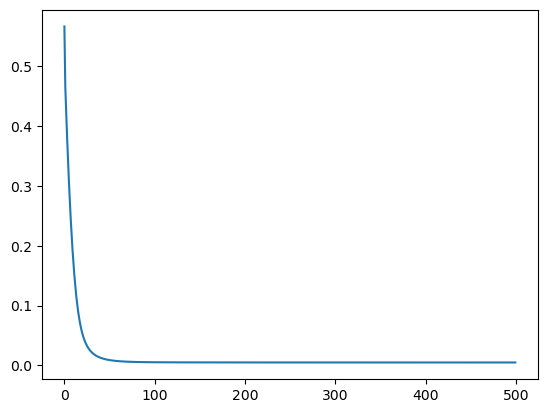

In [212]:
plt.plot(losses)

In [213]:
weight, bias

(tensor([[ 0.2895],
         [ 0.0668],
         [ 0.2862],
         [ 0.1380],
         [ 0.0301],
         [ 0.0405],
         [ 0.0335],
         [ 0.0717],
         [ 0.0282],
         [ 0.0597],
         [-0.0163]], dtype=torch.float64, requires_grad=True),
 tensor([[0.0288]], requires_grad=True))

In [214]:
weight.detach().numpy() * 0.396564 + bias.detach().numpy()

array([[0.14361561],
       [0.05532479],
       [0.14233042],
       [0.08353681],
       [0.04075198],
       [0.04488812],
       [0.04211955],
       [0.05725381],
       [0.04001559],
       [0.05248694],
       [0.02236214]])

In [215]:
# X_test @ weight.detach() + bias.detach()

In [216]:
result = X_test@ weight.detach() + bias.detach()


In [217]:
from torchmetrics import R2Score

r2score = R2Score()
r2 = r2score(X_test @ weight.detach() + bias.detach(), y_test)
print("R^2 Score:", r2.item())


R^2 Score: 0.6350009441375732


In [218]:
y_test[:5], result

(tensor([[0.1833],
         [0.4633],
         [0.3933],
         [0.0867],
         [0.2800]], dtype=torch.float64),
 tensor([[0.1211],
         [0.5959],
         [0.4337],
         [0.0819],
         [0.3147],
         [0.2666],
         [0.3835],
         [0.2235],
         [0.4606],
         [0.0860],
         [0.3859],
         [0.6171],
         [0.5637],
         [0.2895],
         [0.2751],
         [0.4030],
         [0.1181],
         [0.1944],
         [0.4011],
         [0.0871],
         [0.5273],
         [0.3643],
         [0.1788],
         [0.1341],
         [0.1782],
         [0.1159],
         [0.5300],
         [0.2469],
         [0.7729],
         [0.1593],
         [0.2216],
         [0.3293],
         [0.1070],
         [0.2369],
         [0.2371],
         [0.1571],
         [0.1301],
         [0.2696],
         [0.3495],
         [0.4301],
         [0.2421],
         [0.4577],
         [0.3954],
         [0.3226],
         [0.2079],
         [0.2458],
        

In [219]:
X_test[1]

tensor([0.7662, 0.4000, 0.3333, 0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 0.0000], dtype=torch.float64)

In [220]:
torch.tensor([0.2175, 0.2000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        1.0000, 1.0000], dtype=torch.float64) @ weight.detach() + bias.detach()

tensor([[0.2503]], dtype=torch.float64)

In [221]:
normalized_value = 0.1997

In [222]:
torch.exp(torch.tensor([[0.1997]], dtype=torch.float64))

tensor([[1.2210]], dtype=torch.float64)

In [223]:
4.056535e+06

4056535.0

In [224]:
y_test[1]

tensor([0.4633], dtype=torch.float64)